# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

-  In this study, 249 mice who were identified with SCC tumours received treatment with a range of drug regimens. Over the course of 45 days, tumour development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.


Based- 
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
total_mouse_ids = mouse_results_df['Mouse ID'].nunique()
total_mouse_ids #249 mice who were identified

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#subset=['Mouse ID', 'Timepoint'] specifies that you want to check for duplicates based on these two columns.
#keep=False ensures that all instances of the duplicates are marked as True.

duplicate_mice = mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Get all data for the duplicate Mouse IDs
duplicate_mouse_data = mouse_results_df[mouse_results_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
#print(duplicate_mouse_data)

duplicate_mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results_df = mouse_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the clean DataFrame
clean_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_mouse_results_df['Mouse ID'].nunique()
print("clean mice in DataFrame:", unique_mice_count)

# Check for duplicates in the clean DataFrame
has_duplicates = clean_mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint']).any()

if has_duplicates:
    print("There are duplicates in the clean DataFrame.")
else:
    print("There are no duplicates in the clean DataFrame.")

clean mice in DataFrame: 249
There are no duplicates in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)  # Using scipy to calculate SEM
).reset_index()

# Display the summary statistics table
summary_statistics

,Drug Regimen,mean,median,variance,standard_deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics in a single line
summary_statistics = clean_mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)
)

# Display the summary statistics table
summary_statistics

#not really sure what this part is asking for?????

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

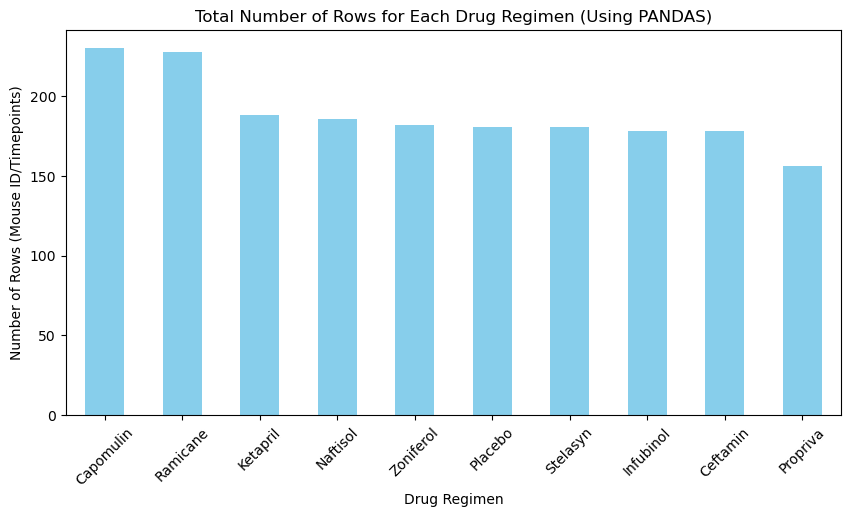

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#clean_mouse_results_df

# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_mouse_results_df['Drug Regimen'].value_counts()

# using Pandas' built-in plotting function to create the bar plot.
regimen_counts.plot(
    kind='bar', 
    color='skyblue', 
    figsize=(10, 5), 
    title='Total Number of Rows for Each Drug Regimen (Using PANDAS)', 
    xlabel='Drug Regimen', 
    ylabel='Number of Rows (Mouse ID/Timepoints)', 
    rot=45
)

plt.show()


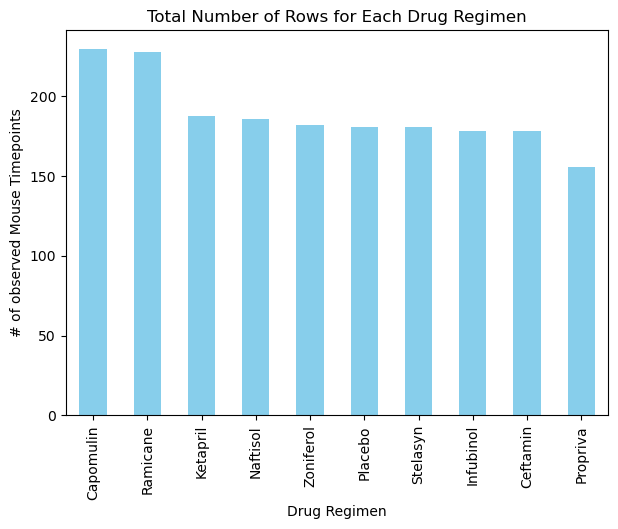

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_mouse_results_df['Drug Regimen'].value_counts()

# Generate the bar plot
plt.figure(figsize=(7, 5))
regimen_counts.plot(kind='bar', color='Skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

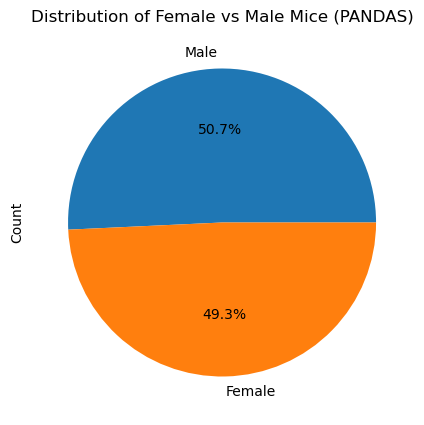

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

# Get the unique counts of female and male mice
gender_counts = clean_mouse_results_df['Sex'].value_counts()



# using Pandas' built-in plotting function to create the bar plot.
gender_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=0,      
    shadow=False,        
    figsize=(10, 5), 
    title='Distribution of Female vs Male Mice (PANDAS)', 
    xlabel='', 
    ylabel='Count', 
    rot=45
)

# Display the pie chart
plt.show()


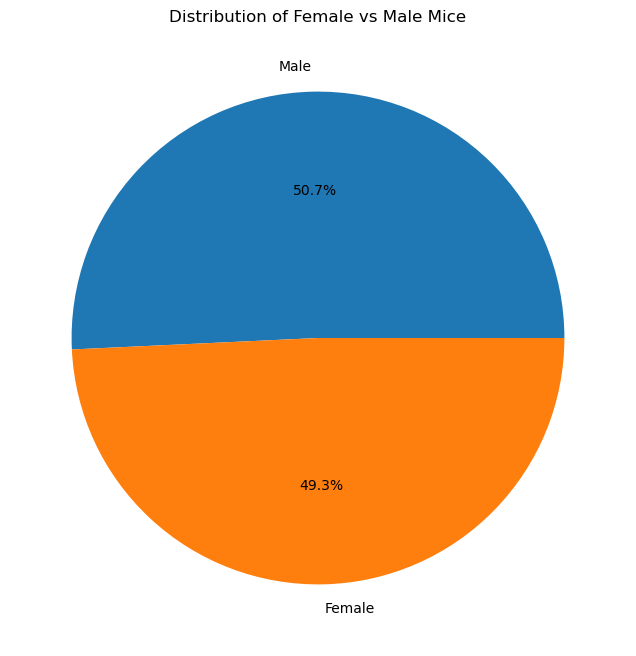

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart



# Get the unique counts of female and male mice
gender_counts = clean_mouse_results_df['Sex'].value_counts()

# Generate the pie chart using PyPlot
plt.figure(figsize=(8, 8))  
plt.pie(
    gender_counts, 
    labels=gender_counts.index,  # Use the index for labels
    autopct='%1.1f%%',           # Show percentages with one decimal place
    startangle=0,               
    shadow=False                  
)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse_results_df.groupby('Mouse ID').max()['Timepoint'].reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(last_timepoint_df, clean_mouse_results_df, on=['Mouse ID', 'Timepoint'])

final_tumor_volumes = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Drug Regimen']]

final_tumor_volumes


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
244,z435,10,48.710661,Propriva
245,z578,45,30.638696,Ramicane
246,z581,45,62.754451,Infubinol
247,z795,45,65.741070,Naftisol


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_groups:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print the results for each treatment
    print(f"{treatment} - IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, Outliers: {outliers.tolist()}")
    


Capomulin - IQR: 7.781863460000004, Lower Bound: 20.70456164999999, Upper Bound: 51.83201549, Outliers: []
Ramicane - IQR: 9.098536719999998, Lower Bound: 17.912664470000003, Upper Bound: 54.30681135, Outliers: []
Infubinol - IQR: 11.477135160000003, Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001, Outliers: [36.3213458]
Ceftamin - IQR: 15.577752179999997, Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999, Outliers: []


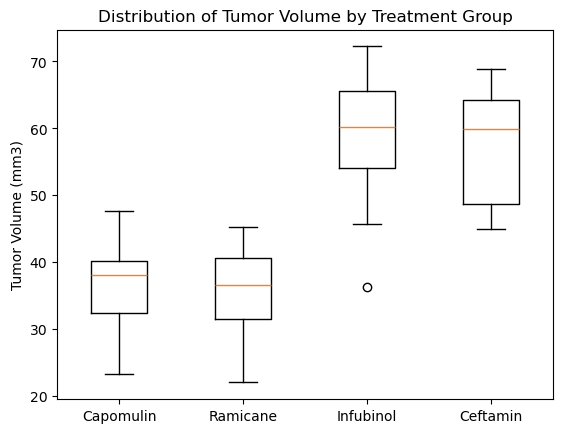

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create a list of tumor volumes for each treatment group
tumor_volumes = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatment_groups]

fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume by Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, labels=treatment_groups)

plt.show()

## Line and Scatter Plots

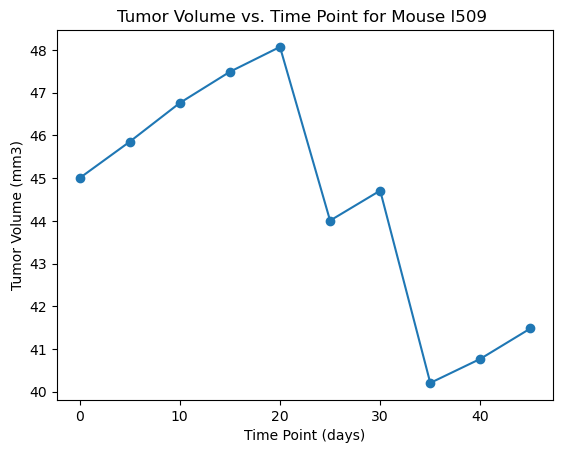

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  
#filtering data we need, mosue Id and drug name.
capomulin_data = clean_mouse_results_df[(clean_mouse_results_df['Mouse ID'] == mouse_id) & 
                                         (clean_mouse_results_df['Drug Regimen'] == 'Capomulin')]

# Step 2: Create the line plot
fig1, ax1 = plt.subplots()
ax1.set_title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} ')
ax1.set_xlabel('Time Point (days)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
plt.show()

#Testing
#print(clean_mouse_results_df)
# Checking data
#print(clean_mouse_results_df.head())

# Find unique mouse IDs and their drug regimens
#print(clean_mouse_results_df[['Mouse ID', 'Drug Regimen']].drop_duplicates())

# Checking if the specific mouse ID exists
#mouse_id = 'l509'  #ID of the mouse you want to plot
#mouse_data = clean_mouse_results_df[clean_mouse_results_df['Mouse ID'] == mouse_id]
#print(mouse_data)



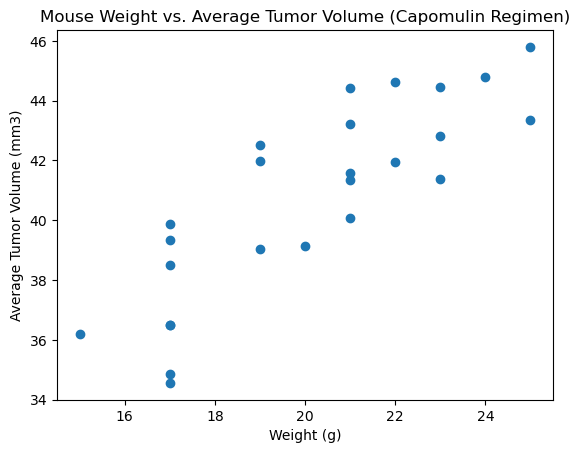

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_results_df[clean_mouse_results_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'}).reset_index()
#Weight (g)
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')

fig, ax = plt.subplots()
ax.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')

ax.set_title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)

plt.show()



## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


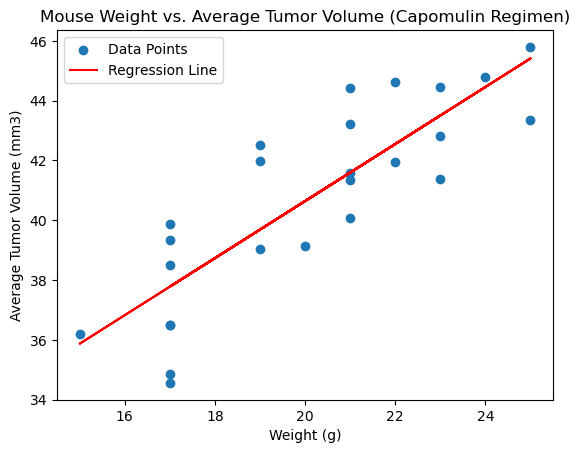

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the DataFrame for the Capomulin regimen
capomulin_data = clean_mouse_results_df[clean_mouse_results_df['Drug Regimen'] == 'Capomulin']

#  Group by Mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'}).reset_index()

# Merge the average tumor volume data with mouse weight data
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

#  Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', label='Data Points')

# Calculate the regression line values
x_values = merged_data['Weight (g)']
y_values = slope * x_values + intercept

# Plot the regression line
ax.plot(x_values, y_values, color='red', label='Regression Line')

# Customize the plot
ax.set_title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.legend()
#plt.grid(True)

# Show the plot
plt.show()

